# Лабораторная работа № 2

## АВТОМАТИЧЕСКАЯ КЛАССИФИКАЦИЯ

## Выполнили:  Асадулин Р.Р., Буриев А.Т., группа – 6512

### Необходимые библиотеки

In [473]:
import numpy as np
import matplotlib.pyplot as plt

### Вариант № 2

In [474]:
N = 50

M_1 = np.array([0, 0]).reshape(2, 1)
M_2 = np.array([1, -1]).reshape(2, 1)
M_3 = np.array([1, 1]).reshape(2, 1)
M_4 = np.array([2, 0]).reshape(2, 1)
M_5 = np.array([3, 1]).reshape(2, 1)
B_1 = np.array(([0.029, 0], [0, 0.07]))
B_2 = np.array(([0.02, 0], [0.3, 0.025]))
B_3 = np.matrix(([0.1, 0], [0, 0.015]))
B_4 = np.array(([0.01, 0], [0.02, 0.095]))
B_5 = np.array(([0.02, 0], [0.3, 0.1]))

In [475]:
print(f"M_1 =", f"{M_1.T}.T")
print(f"M_2 =", f"{M_2.T}.T")
print(f"M_3 =", f"{M_3.T}.T")
print(f"M_4 =", f"{M_4.T}.T")
print(f"M_5 =", f"{M_5.T}.T")
print("B_1 =")
print(B_1)
print("B_2 =")
print(B_2)
print("B_3 =")
print(B_3)
print("B_4 =")
print(B_4)
print("B_5 =")
print(B_5)

M_1 = [[0 0]].T
M_2 = [[ 1 -1]].T
M_3 = [[1 1]].T
M_4 = [[2 0]].T
M_5 = [[3 1]].T
B_1 =
[[0.029 0.   ]
 [0.    0.07 ]]
B_2 =
[[0.02  0.   ]
 [0.3   0.025]]
B_3 =
[[0.1   0.   ]
 [0.    0.015]]
B_4 =
[[0.01  0.   ]
 [0.02  0.095]]
B_5 =
[[0.02 0.  ]
 [0.3  0.1 ]]


### Вспомогательные функции

In [476]:
def show_vector_points(X, color="red"):
    for x in X:
        x = np.array(x).flatten()
#         print(x)
        plt.scatter(x[0], x[1], color=color)


def save_generated_features(filename, data):
    with open(filename, "wb") as f:
        np.save(f, data)

def load_features(filename):
    return np.load(filename)
        
colors = [
    "red",
    "blue",
    "green",
    "yellow",
    "purple",
    "cyan",
    "magenta",
]

### 1. Смоделировать и изобразить графически обучающие выборки объема N=50 для пяти нормально распределенных двумерных случайных векторов с заданными математическими ожиданиями и самостоятельно подобранными корреляционными матрицами, которые обеспечивают линейную разделимость классов.

In [477]:
def generate_class(M, B, N=200):

    samples = None
    sample_cont = None

    for i in range(N):
        sample_cont = generate_norm_distributed_random_vector(M, B)

        if samples is None:
            samples = sample_cont
        else:
            samples = np.concatenate((samples, sample_cont), axis=1)

    return samples.T

In [478]:
def generate_norm_distributed_random_vector(M, B):
    n, _ = B.shape
    A = get_transformation_matrix(B)
    E = get_vector_with_normal_distribution(n)
    return A * E + M

In [479]:
def get_transformation_matrix(B):
    n, _ = B.shape

    A = np.zeros((n, n))

    def get_diagonal_elem(A, i):
        sum_prev_a = 0
        for k in range(i):
            sum_prev_a += A[i, k] ** 2
        return np.sqrt(B[i, i] - sum_prev_a)

    def get_elem(A, i, j):
        sum_a_elems = 0
        for k in range(i):
            sum_a_elems += A[i, k] * A[j, k]
        return (B[i, j] - sum_a_elems) / A[i, i]

    for index, v in np.ndenumerate(A):
        i, j = index

        if i == j:
            A[i, j] = get_diagonal_elem(A, i)

        if 1 <= i and i < j and j <= n - 1:
            A[j, i] = get_elem(A, i, j)

    return A

In [480]:
def get_vector_with_normal_distribution(n, mu=0, sigma=1):
    return np.matrix(np.random.normal(mu, sigma, n)).T

In [481]:
# x1_samples = generate_class(M_1, B_1, N)
# x2_samples = generate_class(M_2, B_2, N)
# x3_samples = generate_class(M_3, B_3, N)
# x4_samples = generate_class(M_4, B_4, N)
# x5_samples = generate_class(M_5, B_5, N)
# save_generated_features('classes.npy', [x1_samples, x2_samples, x3_samples, x4_samples, x5_samples])
x1_samples, x2_samples, x3_samples, x4_samples, x5_samples = load_features('classes.npy')

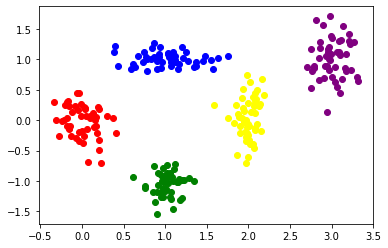

In [491]:
show_vector_points(x1_samples, "red")
show_vector_points(x2_samples, "green")
show_vector_points(x3_samples, "blue")
show_vector_points(x4_samples, "yellow")
show_vector_points(x5_samples, "purple")

### 2. Объединить пять выборок в одну. Общее количество векторов в объединенной выборке должно быть 250. Полученная объединенная выборка используется для выполнения пунктов 3 и 4 настоящего плана.

In [278]:
def merge_classes(class_samples_list, shuffle_mode=True):
    result = None
    for class_samples in class_samples_list:
        if result is None:
            result = class_samples
            continue

        result = np.concatenate((result, class_samples), axis=0)
    if shuffle_mode:
        np.random.shuffle(result)
    return np.array(result)

In [279]:
x_samples = merge_classes([x1_samples, x2_samples, x3_samples, x4_samples, x5_samples])

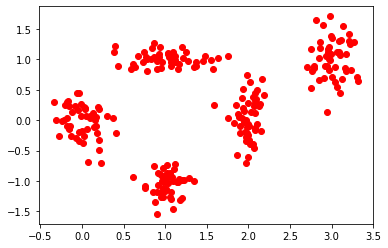

In [283]:
show_vector_points(x_samples, "red")

In [118]:
len(np.array(x_samples))

250

### 3. Разработать программу кластеризации данных с использованием минимаксного алгоритма. В качестве типичного расстояния взять половину среднего расстояния между существующими кластерами. Построить отображение результатов кластеризации для числа кластеров, начиная с двух. Построить график зависимости максимального (из минимальных) и типичного расстояний от числа кластеров.

In [119]:
def calc_dist_for_vectors(vectors, target_vector):
    return np.apply_along_axis(np.linalg.norm, 1, vectors - target_vector)

In [120]:
def calc_example_typical_distanse(centers):
    distances = np.array([])
    for center in centers:
        distances = np.append(distances, calc_dist_for_vectors(centers, center).ravel())
    distances = distances[distances != 0]
    return 0.5 * distances.sum() / len(distances)

In [121]:
def update_labels(x_samples, centers):
    curr_distances = np.array([])
    targets = np.array([])

    for i, sample in enumerate(x_samples):
        dist_cont = calc_dist_for_vectors(centers, sample)
        min_dist_center_index = np.argmin(dist_cont)
        curr_distances = np.append(curr_distances, dist_cont[min_dist_center_index])
        targets = np.append(targets, min_dist_center_index)

    return curr_distances, targets

In [465]:
def maximin_fit_predict(x_samples, typical_dist_func=None):
    def find_first_center(x_samples):
        mean_of_vectors = np.mean(x_samples, axis=0)
        first_center_index = np.argmax(
            calc_dist_for_vectors(x_samples_copy, mean_of_vectors)
        )
        return x_samples[first_center_index]

    def find_second_center(x_samples, first_center):
        second_center_index = np.argmax(calc_dist_for_vectors(x_samples, first_center))
        return x_samples[second_center_index]

    def update_centers(x_samples, curr_distances, centers):
        curr_distances_indices = np.argsort(curr_distances)
        candidate_index = curr_distances_indices[-1]
        candidate = x_samples[candidate_index]
        
        stats_maximin_dist.append(curr_distances[candidate_index])
        
        if curr_distances[candidate_index] > typical_dist_func(centers):
            centers = np.append(centers, [candidate], axis=0)

        return centers
    
    stats_typical_dist = []
    stats_maximin_dist = []
    stats_r = []
    r = 3

    x_samples_copy = x_samples.copy()
    targets = np.array([])
    centers = np.array([find_first_center(x_samples_copy)])

    second_center = find_second_center(x_samples_copy, centers[0])
    centers = np.append(centers, [second_center], axis=0)

    while True:
        update_flag = False
        curr_distances, targets = update_labels(x_samples, centers)
        centers_prev = centers.copy()
        
        stats_typical_dist.append(typical_dist_func(centers))
        stats_r.append(r)
        
        centers = update_centers(x_samples, curr_distances, centers)
        curr_distances, targets = update_labels(x_samples, centers)
        
        r +=1
        
        if np.array_equal(centers_prev, centers):
            break
            
    plt.title("Заивисимость типичного расстояния от номера итерации")
    plt.plot(stats_r, stats_typical_dist)
    plt.show()
    plt.title("Заивисимость максиминного расстояния от номера итерации")
    plt.plot(stats_r, stats_maximin_dist)
    plt.show()
            
    return x_samples_copy, targets, centers

In [466]:
def apply_algorithm(x_samples):
    x_samples, targets, centers = maximin_fit_predict(
        x_samples, calc_example_typical_distanse
    )
    res_clusters = {int(t): [] for t in set(targets)}
    for x, t in zip(x_samples, targets):
        res_clusters[t].append(x)
    return res_clusters, centers

In [467]:
def show_result(x_samples):
    global colors
    for t in res_clusters:
        show_vector_points(np.matrix(res_clusters[t]), colors[t])

#### Результат работы для 2-х кластеров

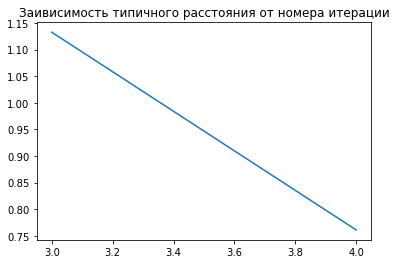

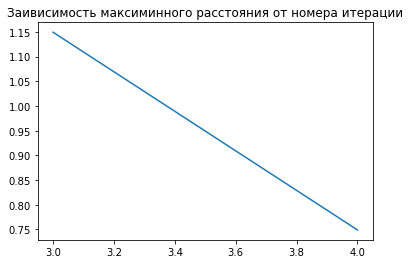

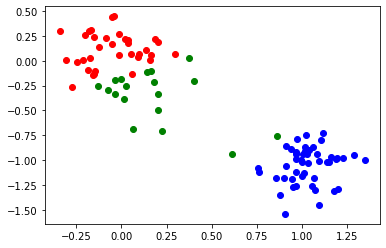

In [468]:
res_clusters, centers_2 = apply_algorithm(merge_classes([x1_samples, x2_samples]))
show_result(res_clusters)

#### Результат работы для 3-х кластеров

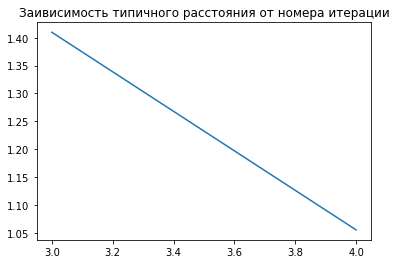

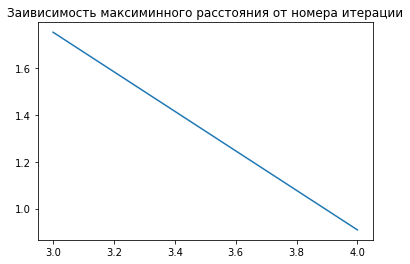

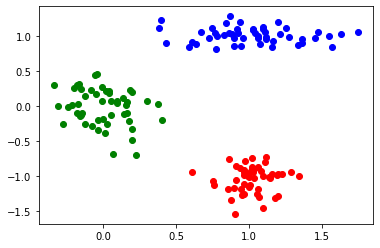

In [469]:
res_clusters, centers_3 = apply_algorithm(
    merge_classes([x1_samples, x2_samples, x3_samples])
)
show_result(res_clusters)

#### Результат работы для 4-х кластеров

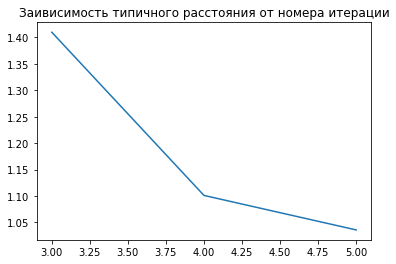

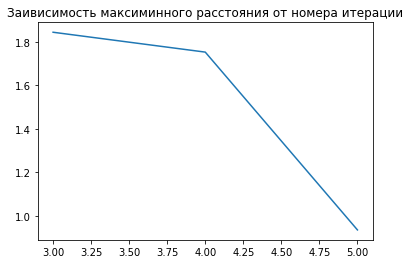

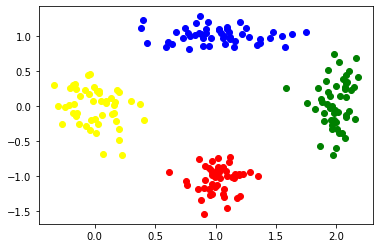

In [470]:
res_clusters, centers_4 = apply_algorithm(
    merge_classes([x1_samples, x2_samples, x3_samples, x4_samples])
)
show_result(res_clusters)

#### Результат работы для 5-х кластеров

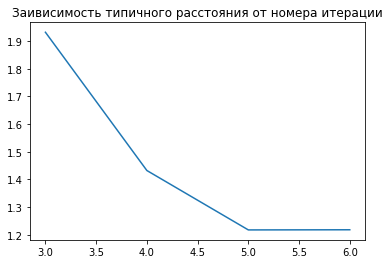

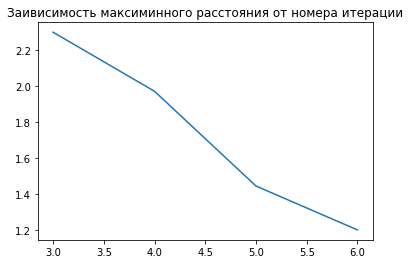

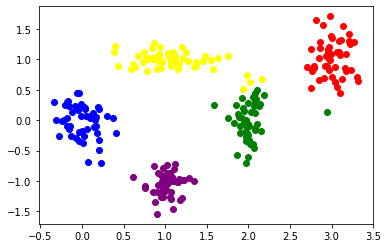

In [471]:
res_clusters, centers_5 = apply_algorithm(
    merge_classes([x1_samples, x2_samples, x3_samples, x4_samples, x5_samples])
)
show_result(res_clusters)

#### График зависимости максимального (из минимальных) и типичного расстояний от числа кластеров

In [472]:
# plt.plot(
#     list(range(2, 6)),
#     [
#         calc_example_typical_distanse(centers_2),
#         calc_example_typical_distanse(centers_3),
#         calc_example_typical_distanse(centers_4),
#         calc_example_typical_distanse(centers_5),
#     ],
# )

### 4. Разработать программу кластеризации данных с использованием алгоритма К внутригрупповых средних для числа кластеров равного 3 и 5. Для ситуации 5 кластеров подобрать начальные условия так, чтобы получить два результата: а) чтобы кластеризация максимально соответствовал первоначальному разбиению на классы ("правильная" кластеризация); б) чтобы кластеризация максимально не соответствовала первоначальному разбиению на классы ("неправильная" кластеризация). Для всех случаев построить графики зависимости числа векторов признаков, сменивших номер кластера, от номера итерации алгоритма.

In [239]:
def k_means_fit_predict(x_samples, K):
    def update_centers(x_samples, targets, centers):
        clusters = {int(t): [] for t in set(targets)}
        for x, t in zip(x_samples, targets):
            clusters[t].append(x)

        return np.array([np.mean(clusters[k], axis=0) for k in clusters])

    centers = x_samples[:K]
    #     centers = np.array([x_samples[55], x_samples[103], x_samples[10], x_samples[11], x_samples[211]]) # пример для "неправильной" классификации
    targets = np.array([])
    r = 2
    stats = []

    while True:
        prev_targets = targets.copy()
        _, targets = update_labels(x_samples, centers)
        centers_prev = centers.copy()
        centers = update_centers(x_samples, targets, centers)
        stats.append((r, sum(prev_targets != targets)))
        if np.array_equal(centers_prev, centers):
            break
        r += 1

    return x_samples, targets, centers, np.array(stats)

#### Результат работы для 3-х кластеров

In [ ]:
x_samples = merge_classes([x1_samples, x2_samples, x3_samples])

In [221]:
x_samples, targets, centers, stats = k_means_fit_predict(x_samples, 3)

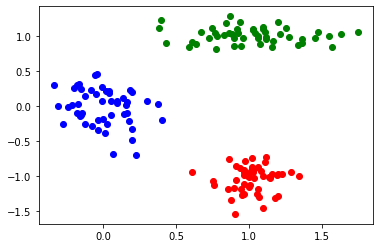

In [222]:
res_clusters = {int(t): [] for t in set(targets)}
for x, t in zip(x_samples, targets):
    res_clusters[t].append(x)

for t in res_clusters:
    show_vector_points(np.matrix(res_clusters[t]), colors[t])

#### График зависимости числа векторов признаков, сменивших номер кластера, от номера итерации алгоритма

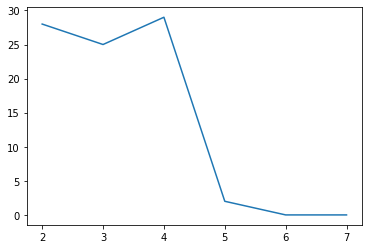

In [223]:
plt.plot(stats[:, 0], stats[:, 1])

#### Результат работы для 5-х кластеров ("правильная" кластеризация)

In [199]:
x_samples = merge_classes([x1_samples, x2_samples, x3_samples, x4_samples, x5_samples])

In [200]:
x_samples, targets, centers, stats = k_means_fit_predict(x_samples, 5)

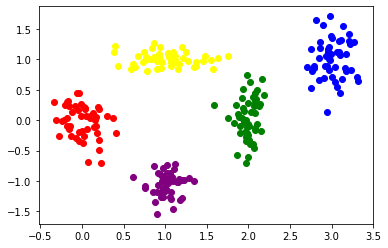

In [201]:
res_clusters = {int(t): [] for t in set(targets)}
for x, t in zip(x_samples, targets):
    res_clusters[t].append(x)

for t in res_clusters:
    show_vector_points(np.matrix(res_clusters[t]), colors[t])

#### График зависимости числа векторов признаков, сменивших номер кластера, от номера итерации алгоритма

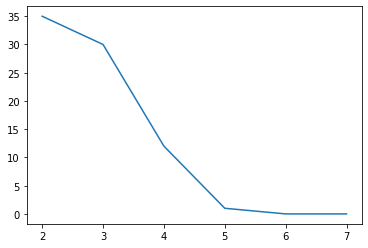

In [202]:
plt.plot(stats[:, 0], stats[:, 1])

#### Результат работы для 5-х кластеров ("неправильная" кластеризация)

In [235]:
x_samples = merge_classes([x1_samples, x2_samples, x3_samples, x4_samples, x5_samples])

In [236]:
x_samples, targets, centers, stats = k_means_fit_predict(x_samples, 5)

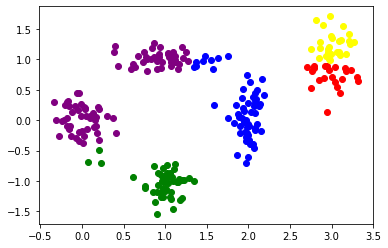

In [237]:
res_clusters = {int(t): [] for t in set(targets)}
for x, t in zip(x_samples, targets):
    res_clusters[t].append(x)

for t in res_clusters:
    show_vector_points(np.matrix(res_clusters[t]), colors[t])

#### График зависимости числа векторов признаков, сменивших номер кластера, от номера итерации алгоритма

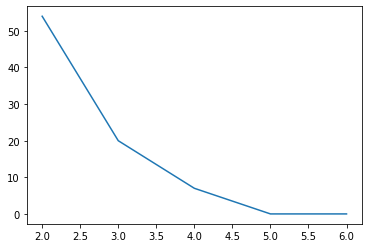

In [238]:
plt.plot(stats[:, 0], stats[:, 1])